**Project Overview**

This study applies machine learning algorithms—LR, RF, SVM, KNN, and DT—to classify transformer health conditions while addressing class imbalance in the dataset. Various resampling techniques were tested, including Random Oversampling, Undersampling, SMOTE, ADASYN, and Cluster Centroids, to enhance fairness and performance. Models were evaluated using Accuracy, Precision, Recall, F1-Score, and AUC to determine the best approach. The goal was to identify the optimal model and resampling method for reliable fault diagnosis in transformers, ensuring accurate predictions and better maintenance strategies.


In [37]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Health index2.csv")


In [38]:
df.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2


In [39]:
# Data augementation : Adding target class

# Create a list to store the 'Condition' values
Condition = []

#For Loop : Iterate through the 'Health index' values
for row in df['Health index']:
    if row > 70:
        Condition.append('Good')
    elif row > 50:
        Condition.append('Fair')
    else:
        Condition.append('Poor')

# Add the 'Condition' column to your DataFrame
df['Condition'] = Condition



In [40]:
df['Condition'] = Condition

In [41]:
# Removing Health Index Column : This is a strategty to avoid data leakage
df = df.drop('Health index', axis=1)

In [32]:
print(df.columns)

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Condition'],
      dtype='object')


In [42]:
df.head()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,Good
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,Good
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,Good
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,Good
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,Good


In [43]:
df['Condition'].value_counts()

,count
Condition,
Poor,420
Fair,41
Good,9


In [44]:
# Get basic information about the dataset (e.g., column names, data types)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Condition            470 non-null    object 
dtypes: float64(2), int64(12), object(1)
memo

In [45]:
# Get summary statistics of numerical columns
df.describe()

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000


In [46]:
# Check for missing values
df.isnull().sum()

,0
Hydrogen,0
Oxigen,0
Nitrogen,0
Methane,0
CO,0
CO2,0
Ethylene,0
Ethane,0
Acethylene,0
DBDS,0


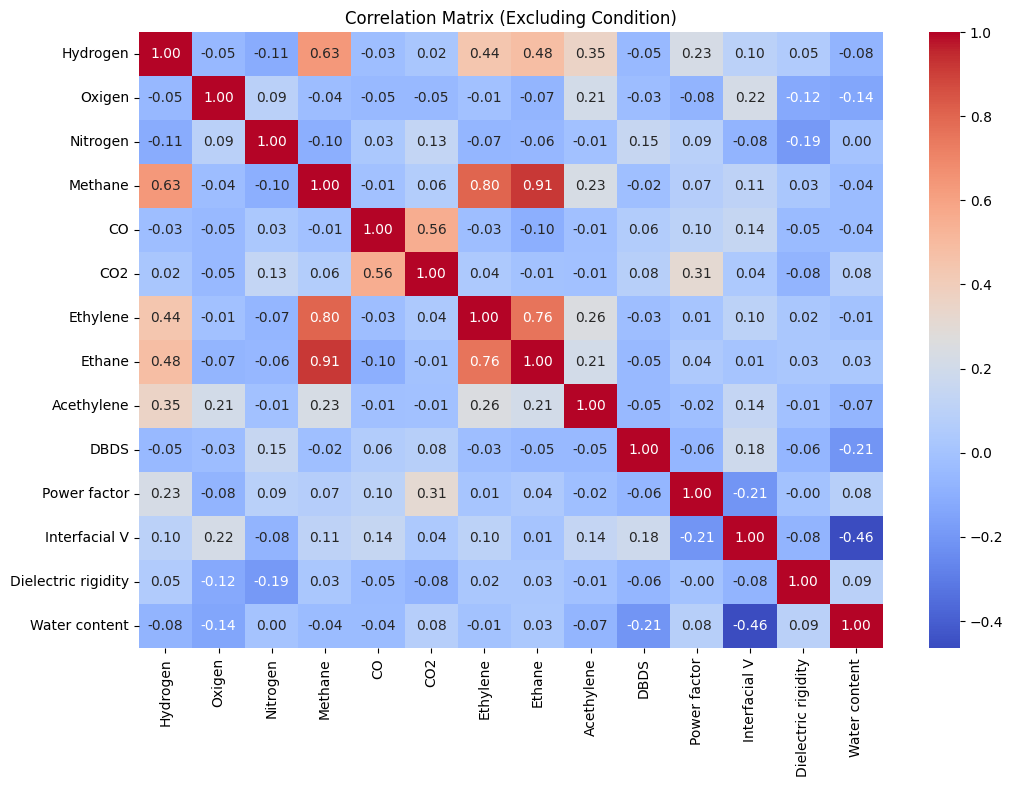

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the categorical column for correlation analysis
df_numeric = df.drop(columns=["Condition"])

# Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Excluding Condition)")
plt.show()



<ipython-input-17-3785471748>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Condition'], palette="viridis")


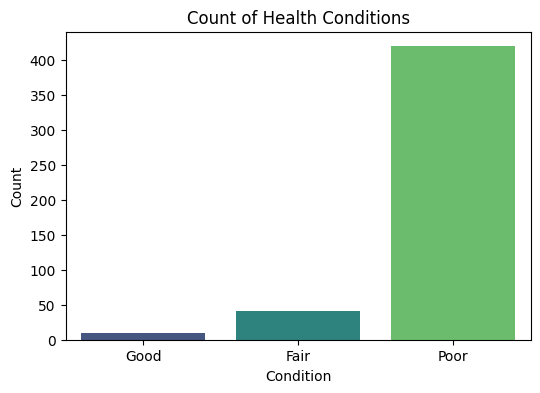

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Condition categories
plt.figure(figsize=(6,4))
sns.countplot(x=df['Condition'], palette="viridis")
plt.title("Count of Health Conditions")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()



<ipython-input-18-909713854>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Condition"], y=df[feature], ax=axes[row, col], palette="coolwarm")
<ipython-input-18-909713854>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Condition"], y=df[feature], ax=axes[row, col], palette="coolwarm")
<ipython-input-18-909713854>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Condition"], y=df[feature], ax=axes[row, col], palette="coolwarm")
<ipython-input-18-909713854>:10: FutureWarning: 

Passing `palette` without assigning `hue`

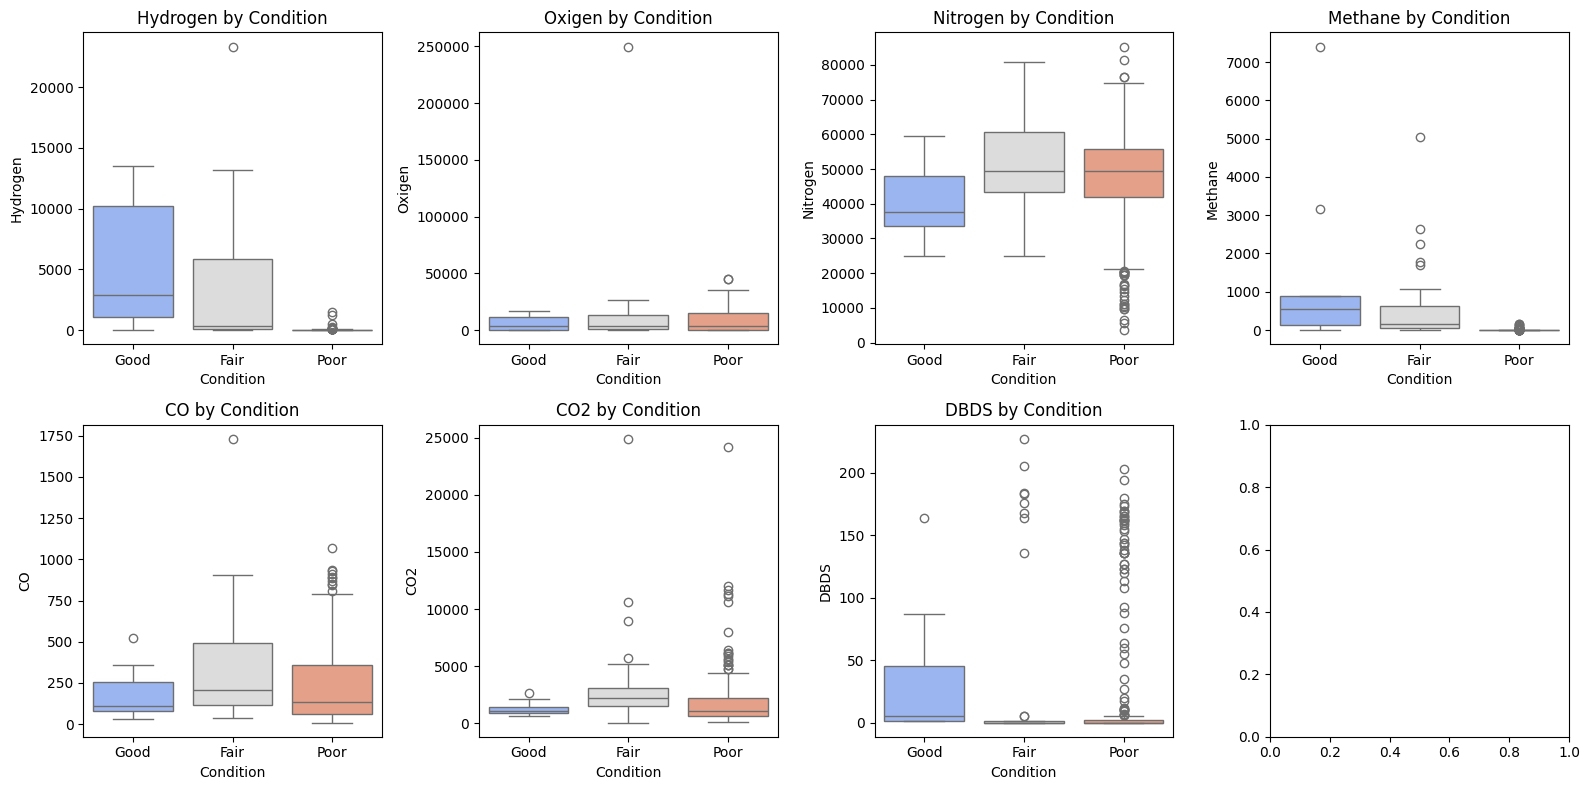

In [18]:
# Select key features for comparison
features = ["Hydrogen", "Oxigen", "Nitrogen", "Methane", "CO", "CO2", "DBDS"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Loop through features and create boxplots
for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    sns.boxplot(x=df["Condition"], y=df[feature], ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{feature} by Condition")

plt.tight_layout()
plt.show()


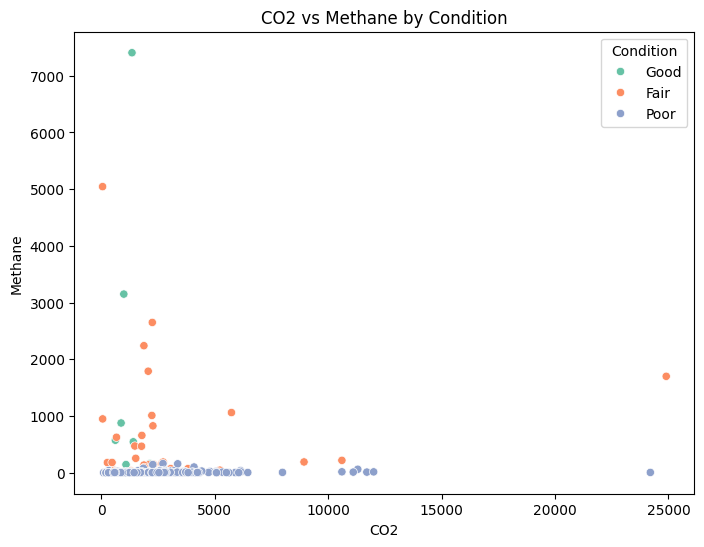

In [19]:
# Scatter plot example: CO2 vs Methane colored by Condition
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["CO2"], y=df["Methane"], hue=df["Condition"], palette="Set2")
plt.title("CO2 vs Methane by Condition")
plt.xlabel("CO2")
plt.ylabel("Methane")
plt.show()


**ENCODING, FEATURE SCALING AND TRAIN-TEST SPLIT**

This section focuses on preparing the data for machine learning by encoding categorical labels, scaling numerical features for consistency, and splitting the dataset into training and test sets to ensure reliable model evaluation. Label encoding was applied to convert "Condition" into a numerical format, feature scaling normalized values to improve model performance, and an 80-20% train-test split was used to assess generalization. These preprocessing steps help create a well-structured dataset for accurate and unbiased predictions.

In [48]:
# ENCODING THE TARGET VARIABLE
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Condition' column
df['Condition_encoded'] = label_encoder.fit_transform(df['Condition'])



In [49]:
print(df.columns)  # List all column names


Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Condition',
       'Condition_encoded'],
      dtype='object')


In [50]:
from sklearn.model_selection import train_test_split

# Exclude both 'Condition_encoded' and 'Condition' columns from the DataFrame to create X
X = df.drop(columns=['Condition_encoded', 'Condition'])

# Create the target variable (y) by selecting the 'Condition_encoded' column
y = df['Condition_encoded']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [51]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



**RESAMPLING METHODS**

This section covers techniques used to balance the dataset, including oversampling (SMOTE, ADASYN, Random Oversampling), undersampling (Random Undersampling, Cluster Centroids), and hybrid methods (SMOTE-Tomek, SMOTE-ENN). These approaches improved model fairness and accuracy by preventing bias toward majority classes.

**Random Oversampler**

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Initialize Random Oversampler
oversampler = RandomOverSampler(random_state=42)

# Count the number of samples in each class before oversampling
print("Before Random Oversampling:")
print(Counter(y_train))

# Resample the training data
X_train_resampled_oversampled, y_train_resampled_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after oversampling
print("\nAfter Random Oversampling:")
print(Counter(y_train_resampled_oversampled))

# Calculate the total number of samples before and after oversampling
total_samples_before = len(y_train)
total_samples_after = len(y_train_resampled_oversampled)
print(f"\nTotal Samples Before Oversampling: {total_samples_before}")
print(f"Total Samples After Oversampling: {total_samples_after}")



Before Random Oversampling:
Counter({2: 337, 0: 31, 1: 8})

After Random Oversampling:
Counter({2: 337, 0: 337, 1: 337})

Total Samples Before Oversampling: 376
Total Samples After Oversampling: 1011


**Random Undersampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Initialize Random Undersampler
undersampler = RandomUnderSampler(random_state=42)

# Count the number of samples in each class before undersampling
print("Before Random Undersampling:")
print(Counter(y_train))

# Resample the training data
X_train_resampled_undersampled, y_train_resampled_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after undersampling
print("\nAfter Random Undersampling:")
print(Counter(y_train_resampled_undersampled))

# Calculate the total number of samples before and after undersampling
total_samples_before = len(y_train)
total_samples_after = len(y_train_resampled_undersampled)
print(f"\nTotal Samples Before Undersampling: {total_samples_before}")
print(f"Total Samples After Undersampling: {total_samples_after}")


Before Random Undersampling:
Counter({2: 337, 0: 31, 1: 8})

After Random Undersampling:
Counter({0: 8, 1: 8, 2: 8})

Total Samples Before Undersampling: 376
Total Samples After Undersampling: 24


**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE Oversampler
smote = SMOTE(random_state=42)

# Count the number of samples in each class before SMOTE
print("Before SMOTE:")
print(Counter(y_train))

# Resample the training data using SMOTE
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after SMOTE
print("\nAfter SMOTE:")
print(Counter(y_train_resampled_smote))

# Calculate the total number of samples before and after SMOTE
total_samples_before_smote = len(y_train)
total_samples_after_smote = len(y_train_resampled_smote)
print(f"\nTotal Samples Before SMOTE: {total_samples_before_smote}")
print(f"Total Samples After SMOTE: {total_samples_after_smote}")


Before SMOTE:
Counter({2: 337, 0: 31, 1: 8})

After SMOTE:
Counter({2: 337, 0: 337, 1: 337})

Total Samples Before SMOTE: 376
Total Samples After SMOTE: 1011


**ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Initialize ADASYN Oversampler
adasyn = ADASYN(random_state=42)

# Count the number of samples in each class before ADASYN
print("Before ADASYN:")
print(Counter(y_train))

# Resample the training data using ADASYN
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after ADASYN
print("\nAfter ADASYN:")
print(Counter(y_train_resampled_adasyn))

# Calculate the total number of samples before and after ADASYN
total_samples_before_adasyn = len(y_train)
total_samples_after_adasyn = len(y_train_resampled_adasyn)
print(f"\nTotal Samples Before ADASYN: {total_samples_before_adasyn}")
print(f"Total Samples After ADASYN: {total_samples_after_adasyn}")


Before ADASYN:
Counter({2: 337, 0: 31, 1: 8})

After ADASYN:
Counter({0: 339, 1: 338, 2: 337})

Total Samples Before ADASYN: 376
Total Samples After ADASYN: 1014


**SMOTE-ENN**

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize SMOTE-ENN Oversampler
smote_enn = SMOTEENN(random_state=42)

# Count the number of samples in each class before SMOTE-ENN
print("Before SMOTE-ENN:")
print(Counter(y_train))

# Resample the training data using SMOTE-ENN
X_train_resampled_smote_enn, y_train_resampled_smote_enn = smote_enn.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after SMOTE-ENN
print("\nAfter SMOTE-ENN:")
print(Counter(y_train_resampled_smote_enn))

# Calculate the total number of samples before and after SMOTE-ENN
total_samples_before_smote_enn = len(y_train)
total_samples_after_smote_enn = len(y_train_resampled_smote_enn)
print(f"\nTotal Samples Before SMOTE-ENN: {total_samples_before_smote_enn}")
print(f"Total Samples After SMOTE-ENN: {total_samples_after_smote_enn}")


Before SMOTE-ENN:
Counter({2: 337, 0: 31, 1: 8})

After SMOTE-ENN:
Counter({1: 337, 0: 320, 2: 273})

Total Samples Before SMOTE-ENN: 376
Total Samples After SMOTE-ENN: 930


**SMOTE-Tomek**

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Initialize SMOTE-Tomek Oversampler
smote_tomek = SMOTETomek(random_state=42)

# Count the number of samples in each class before SMOTE-Tomek
print("Before SMOTE-Tomek:")
print(Counter(y_train))

# Resample the training data using SMOTE-Tomek
X_train_resampled_smote_tomek, y_train_resampled_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after SMOTE-Tomek
print("\nAfter SMOTE-Tomek:")
print(Counter(y_train_resampled_smote_tomek))

# Calculate the total number of samples before and after SMOTE-Tomek
total_samples_before_smote_tomek = len(y_train)
total_samples_after_smote_tomek = len(y_train_resampled_smote_tomek)
print(f"\nTotal Samples Before SMOTE-Tomek: {total_samples_before_smote_tomek}")
print(f"Total Samples After SMOTE-Tomek: {total_samples_after_smote_tomek}")


Before SMOTE-Tomek:
Counter({2: 337, 0: 31, 1: 8})

After SMOTE-Tomek:
Counter({1: 337, 2: 335, 0: 335})

Total Samples Before SMOTE-Tomek: 376
Total Samples After SMOTE-Tomek: 1007


**SVM-SMOTE**

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from collections import Counter

# Initialize SVM-SMOTE Oversampler
svm_smote = SVMSMOTE(random_state=42)

# Count the number of samples in each class before SVM-SMOTE
print("Before SVM-SMOTE:")
print(Counter(y_train))

# Resample the training data using SVM-SMOTE
X_train_resampled_svm_smote, y_train_resampled_svm_smote = svm_smote.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after SVM-SMOTE
print("\nAfter SVM-SMOTE:")
print(Counter(y_train_resampled_svm_smote))

# Calculate the total number of samples before and after SVM-SMOTE
total_samples_before_svm_smote = len(y_train)
total_samples_after_svm_smote = len(y_train_resampled_svm_smote)
print(f"\nTotal Samples Before SVM-SMOTE: {total_samples_before_svm_smote}")
print(f"Total Samples After SVM-SMOTE: {total_samples_after_svm_smote}")


Before SVM-SMOTE:
Counter({2: 337, 0: 31, 1: 8})

After SVM-SMOTE:
Counter({2: 337, 0: 337, 1: 172})

Total Samples Before SVM-SMOTE: 376
Total Samples After SVM-SMOTE: 846


**Cluster Centroids**

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

# Initialize Cluster Centroids Undersampler
cluster_centroids = ClusterCentroids(random_state=42)

# Count the number of samples in each class before Cluster Centroids
print("Before Cluster Centroids:")
print(Counter(y_train))

# Undersample the training data using Cluster Centroids
X_train_resampled_cluster_centroids, y_train_resampled_cluster_centroids = cluster_centroids.fit_resample(X_train_scaled, y_train)

# Count the number of samples in each class after Cluster Centroids
print("\nAfter Cluster Centroids:")
print(Counter(y_train_resampled_cluster_centroids))

# Calculate the total number of samples before and after Cluster Centroids
total_samples_before_cluster_centroids = len(y_train)
total_samples_after_cluster_centroids = len(y_train_resampled_cluster_centroids)
print(f"\nTotal Samples Before Cluster Centroids: {total_samples_before_cluster_centroids}")
print(f"Total Samples After Cluster Centroids: {total_samples_after_cluster_centroids}")


Before Cluster Centroids:
Counter({2: 337, 0: 31, 1: 8})

After Cluster Centroids:
Counter({0: 8, 1: 8, 2: 8})

Total Samples Before Cluster Centroids: 376
Total Samples After Cluster Centroids: 24


**MODEL BUILDING AND EVALUATION**

This section covers the development and assessment of LR, RF, SVM, KNN, and DT, trained on balanced datasets using various resampling methods. Models were evaluated using Accuracy, Precision, Recall, F1-Score, and AUC, helping identify the best approach for classifying health conditions.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
import numpy as np

**LOGISTIC REGRESSION MODEL**



In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Define Logistic Regression model
logistic_regression = LogisticRegression(
    random_state=42, max_iter=1000, multi_class='multinomial', solver='saga'
)

# Define parameter grid for hyperparameter optimization
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    logistic_regression, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Print results for different resampling methods
for resampling_method, result in results.items():
    print(f'Resampling Method: {resampling_method}')
    print(f'Cross-Validation Scores: {result["Cross-Validation Scores"]}')
    print(f'Best Hyperparameters: {result["Best Hyperparameters"]}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'F1 Score: {result["F1 Score"]}')
    print(f'ROC AUC: {result["ROC AUC"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Recall: {result["Recall"]}')
    print('-' * 50)


Resampling Method: Original Scaled Data
Cross-Validation Scores: [0.96052632 0.96       0.88       0.92       0.96      ]
Best Hyperparameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9468085106382979
F1 Score: 0.9372966207759699
ROC AUC: 0.7552378129763168
Confusion Matrix:
[[ 6  0  4]
 [ 1  0  0]
 [ 0  0 83]]
Precision: 0.9335674108234636
Recall: 0.9468085106382979
--------------------------------------------------
Resampling Method: Random Oversampling
Cross-Validation Scores: [0.90147783 0.91089109 0.92574257 0.8960396  0.92574257]
Best Hyperparameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty

**SVM Model**

In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define SVM model
svm_classifier = SVC(
    random_state=42,
    probability=True  # Enable probability estimates for ROC AUC calculation
)

# Define parameter grid for hyperparameter optimization (customize as needed)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    svm_classifier, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through (customize as needed)
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Print results for different resampling methods
for resampling_method, result in results.items():
    print(f'Resampling Method: {resampling_method}')
    print(f'Cross-Validation Scores: {result["Cross-Validation Scores"]}')
    print(f'Best Hyperparameters: {result["Best Hyperparameters"]}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'F1 Score: {result["F1 Score"]}')
    print(f'ROC AUC: {result["ROC AUC"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Recall: {result["Recall"]}')
    print('-' * 50)


Resampling Method: Original Scaled Data
Cross-Validation Scores: [0.96052632 0.96       0.88       0.94666667 0.94666667]
Best Hyperparameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy: 0.9361702127659575
F1 Score: 0.9277770783499097
ROC AUC: 0.7400640140001842
Confusion Matrix:
[[ 6  0  4]
 [ 1  0  0]
 [ 1  0 82]]
Precision: 0.9216971796140524
Recall: 0.9361702127659575
--------------------------------------------------
Resampling Method: Random Oversampling
Cross-Validation Scores: [0.95566502 0.94059406 0.96534653 0.96039604 0.95544554]
Best Hyperparameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, '

**RANDOM FOREST**

In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define a parameter grid for hyperparameter optimization (customize as needed)
param_grid = {
    'n_estimators': [50, 100],  # Adjust the number of trees
    'max_depth': [None, 10],  # Adjust the maximum depth of trees
    'min_samples_split': [2, 5],  # Adjust the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Adjust the minimum number of samples required to be at a leaf node
    'bootstrap': [True]  # Adjust whether bootstrap samples are used when building trees
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    random_forest, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through (customize as needed)
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Shuffle the resampled data for randomness
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Print results for different resampling methods
for resampling_method, result in results.items():
    print(f'Resampling Method: {resampling_method}')
    print(f'Cross-Validation Scores: {result["Cross-Validation Scores"]}')
    print(f'Best Hyperparameters: {result["Best Hyperparameters"]}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'F1 Score: {result["F1 Score"]}')
    print(f'ROC AUC: {result["ROC AUC"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Recall: {result["Recall"]}')
    print('-' * 50)


Resampling Method: Original Scaled Data
Cross-Validation Scores: [0.90789474 0.93333333 0.94666667 0.94666667 0.96      ]
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9361702127659575
F1 Score: 0.9277770783499097
ROC AUC: 0.9572338122870038
Confusion Matrix:
[[ 6  0  4]
 [ 1  0  0]
 [ 1  0 82]]
Precision: 0.9216971796140524
Recall: 0.9361702127659575
--------------------------------------------------
Resampling Method: Random Oversampling
Cross-Validation Scores: [0.99507389 1.         1.         1.         0.98514851]
Best Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': '

**Random Forest Model : Towards individual class and Feature importance**

In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
    classification_report,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import pandas as pd  # Added for feature importance

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define a parameter grid for hyperparameter optimization (customize as needed)
param_grid = {
    'n_estimators': [50, 100],  # Adjust the number of trees
    'max_depth': [None, 10],  # Adjust the maximum depth of trees
    'min_samples_split': [2, 5],  # Adjust the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Adjust the minimum number of samples required to be at a leaf node
    'bootstrap': [True],  # Adjust whether bootstrap samples are used when building trees
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    random_forest, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through (customize as needed)
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Shuffle the resampled data for randomness
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

    # Calculate and print classification report with precision, recall, and F1 for each class
    class_labels = [str(label) for label in lb.classes_]
    class_report = classification_report(
        [str(label) for label in y_test_bin.argmax(axis=1)],
        [str(label) for label in y_pred_bin.argmax(axis=1)],
        target_names=class_labels
    )
    print(f'Resampling Method: {resampling_method}')
    print(f'Classification Report:\n{class_report}')
    print('-' * 50)

# Extract feature importances using Gini impurity for RandomForestClassifier
feature_importance_rf = best_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df_rf = pd.DataFrame({
    'Feature': X.columns,  # Replace 'X' with the name of your feature dataset
    'Importance': feature_importance_rf
})

# Sort the DataFrame by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the top N most important features (customize N as needed)
top_n = 7  # Change to the number of top features you want to display
print(f'Top {top_n} Most Important Features:')
print(feature_importance_df_rf.head(top_n))


Resampling Method: Original Scaled Data
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.00      0.00      0.00         1
           2       0.95      0.99      0.97        83

    accuracy                           0.94        94
   macro avg       0.57      0.53      0.55        94
weighted avg       0.92      0.94      0.93        94

--------------------------------------------------
Resampling Method: Random Oversampling
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.00      0.00      0.00         1
           2       0.95      0.99      0.97        83

    accuracy                           0.94        94
   macro avg       0.57      0.53      0.55        94
weighted avg       0.92      0.94      0.93        94

--------------------------------------------------
Resampling 

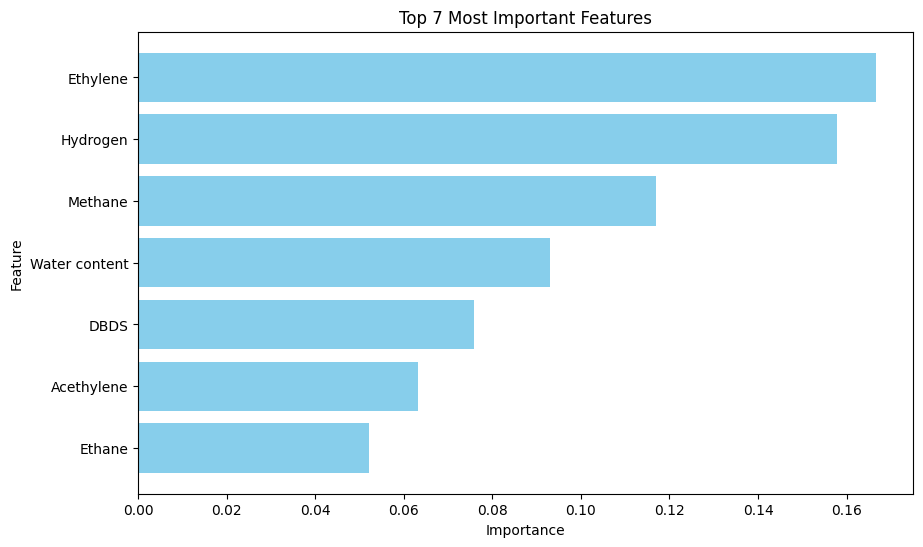

In [ ]:
#  Bar Graph showing feature importances

import matplotlib.pyplot as plt

# Replace 'feature_importance_df_rf' with your DataFrame containing feature importances
top_n = 7  # Change to the number of top features you want to display
top_features = feature_importance_df_rf.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


**Decision Tree Model**

In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Define a parameter grid for hyperparameter optimization
param_grid = {
    'max_depth': [None, 10, 20],  # Adjust the max depth of the tree
    'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Adjust the minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Adjust the split criterion
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    decision_tree, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Shuffle the resampled data for randomness
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Print results for different resampling methods
for resampling_method, result in results.items():
    print(f'Resampling Method: {resampling_method}')
    print(f'Cross-Validation Scores: {result["Cross-Validation Scores"]}')
    print(f'Best Hyperparameters: {result["Best Hyperparameters"]}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'F1 Score: {result["F1 Score"]}')
    print(f'ROC AUC: {result["ROC AUC"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Recall: {result["Recall"]}')
    print('-' * 50)


Resampling Method: Original Scaled Data
Cross-Validation Scores: [0.90789474 0.92       0.90666667 0.94666667 0.90666667]
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Accuracy: 0.925531914893617
F1 Score: 0.9156445556946183
ROC AUC: 0.7613985476888702
Confusion Matrix:
[[ 4  1  5]
 [ 0  1  0]
 [ 1  0 82]]
Precision: 0.9226583516752263
Recall: 0.925531914893617
--------------------------------------------------
Resampling Method: Random Oversampling
Cross-Validation Scores: [0.97044335 0.9950495  0.99009901 1.         0.99009901]
Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_s

**K-NN Model**

In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle

# Set a fixed random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define K-NN model
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter optimization (customize as needed)
param_grid = {
    'n_neighbors': [3, 5, 7],  # Adjust the number of neighbors
    'weights': ['uniform', 'distance'],  # Adjust the weight function
    'p': [1, 2],  # Adjust the power parameter for the Minkowski distance
}

# Create GridSearchCV object with 5-fold stratified cross-validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    knn_classifier, param_grid, cv=cv_stratified, scoring='accuracy', n_jobs=-1
)

# Initialize dictionaries to store results for different resampling methods
results = {
    'Original Scaled Data': {},
    'Random Oversampling': {},
    'Random Undersampling': {},
    'SMOTE': {},
    'ADASYN': {},
    'SVM-SMOTE': {},
    'SMOTE TOMEK': {},
    'SMOTE ENN': {},
    'CLUSTER CENTROIDS': {},
}

# Create a list of resampling methods to loop through (customize as needed)
resampling_methods = {
    'Original Scaled Data': (X_train_scaled, y_train),
    'Random Oversampling': (RandomOverSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'Random Undersampling': (RandomUnderSampler(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE': (SMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'ADASYN': (ADASYN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SVM-SMOTE': (SVMSMOTE(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE TOMEK': (SMOTETomek(random_state=42).fit_resample(X_train_scaled, y_train)),
    'SMOTE ENN': (SMOTEENN(random_state=42).fit_resample(X_train_scaled, y_train)),
    'CLUSTER CENTROIDS': (ClusterCentroids(random_state=42).fit_resample(X_train_scaled, y_train))
}

# Loop through the resampling methods
for resampling_method, (X_resampled, y_resampled) in resampling_methods.items():
    # Shuffle the resampled data for randomness
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

    # Create a pipeline with the resampling method and the classifier
    model = Pipeline([
        ('classifier', grid_search)
    ])

    # Fit the model on the resampled data
    model.fit(X_resampled, y_resampled)

    # Cross-validation
    cross_val_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv_stratified, scoring='accuracy')

    # Hyperparameter optimization
    best_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Initialize LabelBinarizer
    lb = LabelBinarizer()

    # Transform the target variables
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin, average='weighted')

    # Calculate ROC AUC for multi-class classification
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test_scaled), average='weighted')

    cm = confusion_matrix(y_test_bin.argmax(axis=1), y_pred_bin.argmax(axis=1))
    precision = precision_score(y_test_bin, y_pred_bin, average='weighted')
    recall = recall_score(y_test_bin, y_pred_bin, average='weighted')

    # Store results in the dictionary
    results[resampling_method] = {
        'Cross-Validation Scores': cross_val_scores,
        'Best Hyperparameters': best_model.get_params(),
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Print results for different resampling methods
for resampling_method, result in results.items():
    print(f'Resampling Method: {resampling_method}')
    print(f'Cross-Validation Scores: {result["Cross-Validation Scores"]}')
    print(f'Best Hyperparameters: {result["Best Hyperparameters"]}')
    print(f'Accuracy: {result["Accuracy"]}')
    print(f'F1 Score: {result["F1 Score"]}')
    print(f'ROC AUC: {result["ROC AUC"]}')
    print(f'Confusion Matrix:\n{result["Confusion Matrix"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Recall: {result["Recall"]}')
    print('-' * 50)


Resampling Method: Original Scaled Data
Cross-Validation Scores: [0.90789474 0.93333333 0.93333333 0.93333333 0.93333333]
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.925531914893617
F1 Score: 0.9089147286821705
ROC AUC: 0.78632634809711
Confusion Matrix:
[[ 4  0  6]
 [ 1  0  0]
 [ 0  0 83]]
Precision: 0.9085584508725794
Recall: 0.925531914893617
--------------------------------------------------
Resampling Method: Random Oversampling
Cross-Validation Scores: [0.98029557 0.99009901 0.95544554 0.99009901 0.97029703]
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy: 0.8617021276595744
F1 Score: 0.8639417693169094
ROC AUC: 0.7794748148214174
Confusion Matrix:
[[ 4  0  6]
 [ 1  0  0]
 [ 4  2 77]]
Precision: 0.86643026004728